In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers 
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

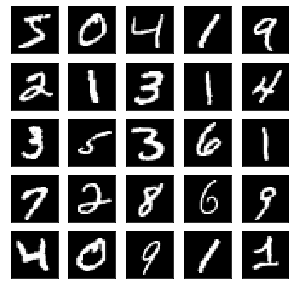

In [3]:
plt.figure(figsize = (5,5))
for i in range(25):    
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap = 'binary_r')
    plt.xticks([])
    plt.yticks([])
    

In [4]:
#preparing data
x_train = np.reshape(x_train, (x_train.shape[0],28,28,1))
x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train)

x_val = np.reshape(x_test, (x_test.shape[0],28,28,1))
x_val = x_val / 255.0
y_val= tf.keras.utils.to_categorical(y_test)

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(2,2),strides = 2, input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Conv2D(128,(2,2),strides = 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu', use_bias = True))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(0.001),metrics = ['acc'])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [11]:
history = model.fit(x_train,y_train, epochs = 1)

1875/1875 [==============================] - 211s 112ms/step - loss: 0.3697 - acc: 0.8839


In [12]:
model.evaluate(x_val,y_val)

313/313 [==============================] - 11s 35ms/step - loss: 0.1362 - acc: 0.9566


[0.13622038066387177, 0.95660001039505]

In [ ]:
model.save('myTrue_mode.h5')